<center>
    <img src="1.png" alt="Image Description" style="width: 50%;"/>
</center>

<div style="text-align: center; margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#ffe6cc; padding: 10px 150px; border-radius: 10px; font-size: 20pt; font-weight: bold;">CIS600 - Applied Natural Language Processing</span>
</div>

<div style="text-align: center; margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#ffe6cc; padding: 10px 150px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Term Project - Spring 2024</span>
</div>

<span style="color: #000080; font-family: Arial, sans-serif; font-size: 20pt; font-weight: bold;">Team Members :</span>

## Venkata Sri Siva Ramakrishna Palaparthy - 433976193<br>Nikhilesh Gunnam - 502430168<br>Prathik Reddy Sannapureddy - 344477369<br>Girish Kanjiyani - 587443048<br>Ruiying Chen - 255618384


<div style="text-align: center; margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#ffe6cc; padding: 10px 100px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Sentiment Analysis On Syrian Civil War Using Reddit Data</span>
</div>

<div style="border-bottom: 2px solid #000;"></div>

<div style="margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#ccffff; padding: 10px 20px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Libraries And Utilities</span>
</div>

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a 
# version using "Save & Run All" 

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/SyrianRebels_reddit_posts.csv
/kaggle/input/syrianconflict_reddit_posts.csv
/kaggle/input/SyrianCirclejerkWar_reddit_posts.csv
/kaggle/input/AskMiddleEast_reddit_posts.csv
/kaggle/input/syriancivilwar_reddit_posts.csv


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
import numpy as np
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
# !pip install twython 
import numpy as np
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
# plotly: Interactive plotting library for creating web-based visualizations
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
pyo.init_notebook_mode()
# sklearn : Scikit-learn, machine learning library for data mining and data analysis
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import Isomap
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# nltk.download('vader_lexicon')
from sklearn.cluster import KMeans
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR,AutoReg
from nltk.util import ngrams
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy as sp
nlps = sp.load("en_core_web_sm")
import random
plt.rc('figure',figsize=(17,13))
from datetime import datetime

<div style="text-align: center; margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#cceeff; padding: 10px 150px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Data Collection And Importing</span>
</div>

In [4]:
# Read data from CSV file
# source_data = pd.read_csv("/kaggle/input/reddit-SyriaCivilWar-posts/reddit_posts.csv")
# source_data["timestamp"] = source_data["timestamp"].apply(lambda x: datetime.utcfromtimestamp(x))

In [5]:
import pandas as pd
import os

# List of file names
file_names = [
    "AskMiddleEast_reddit_posts.csv",
    "SyrianCirclejerkWar_reddit_posts.csv",
    "SyrianRebels_reddit_posts.csv",
    "syriancivilwar_reddit_posts.csv",
    "syrianconflict_reddit_posts.csv"
]

# Initialize an empty DataFrame to store the merged data
merged_df = pd.DataFrame()

# Loop through each file and merge it into the main DataFrame
for file_name in file_names:
    # Assuming the CSV files have a common structure, you can use read_csv to load them
    df = pd.read_csv("/kaggle/input/" + file_name)
    
    # Merge the current DataFrame with the main DataFrame
    merged_df = pd.concat([merged_df, df], ignore_index=True)
merged_df["timestamp"] = merged_df["timestamp"].apply(lambda x: datetime.utcfromtimestamp(x))
# Display the merged DataFrame
print(merged_df)



                                                   title  score       id  \
0                              How can I help Palestine?      9  1c0vmf9   
1      To largest 3 ethnic groups what is  your thoug...     12  1c0vfmu   
2      If a war errupts in the  middle east between I...      3  1c0vezq   
3                                   UAE 🇦🇪 - Algeria 🇩🇿       8  1c0s1vb   
4      We have always been kooky to you RETVRN Westoi...     48  1c0rqul   
...                                                  ...    ...      ...   
49995  Why Syria is facing a situation like India whe...      5   n43nyl   
49996  British girl was trafficked to Syria aged 12 b...      3   n1qplw   
49997  Iraq is exploring the possibility of importing...      2   n14v8g   
49998  10 years of unrelenting violence in Syria, wit...      7   mghst2   
49999  The US continues to contribute to the prosperi...      2   mfk9c1   

                                                     url  comms_num  \
0      https://w

In [6]:
merged_df.head()

title  score       id  \
0                          How can I help Palestine?      9  1c0vmf9   
1  To largest 3 ethnic groups what is  your thoug...     12  1c0vfmu   
2  If a war errupts in the  middle east between I...      3  1c0vezq   
3                               UAE 🇦🇪 - Algeria 🇩🇿       8  1c0s1vb   
4  We have always been kooky to you RETVRN Westoi...     48  1c0rqul   

                                                 url  comms_num       created  \
0  https://www.reddit.com/r/AskMiddleEast/comment...          8  1.712781e+09   
1                https://i.redd.it/luo0z599nptc1.png         22  1.712780e+09   
2  https://www.reddit.com/r/AskMiddleEast/comment...          2  1.712780e+09   
3  https://www.reddit.com/r/AskMiddleEast/comment...         11  1.712772e+09   
4               https://i.redd.it/bpstbdj6wotc1.jpeg         36  1.712771e+09   

                                                body           timestamp  \
0  I'm from the US & historically not politically... 2024-04-10 20:26:14   
1                                                NaN 2024-04-10 20:18:40   
2  \nLike trade on land, water and air. And air t... 2024-04-10 20:17:54   
3  Why is the UAE so hostile towards Algeria rece... 2024-04-10 18:02:24   
4                                                NaN 2024-04-10 17:49:52   

       subreddit  
0  AskMiddleEast  
1  AskMiddleEast  
2  AskMiddleEast  
3  AskMiddleEast  
4  AskMiddleEast

In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      50000 non-null  object        
 1   score      50000 non-null  int64         
 2   id         50000 non-null  object        
 3   url        50000 non-null  object        
 4   comms_num  50000 non-null  int64         
 5   created    50000 non-null  float64       
 6   body       8851 non-null   object        
 7   timestamp  50000 non-null  datetime64[ns]
 8   subreddit  50000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 3.4+ MB


<div style="margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#cceeff; padding: 10px 20px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Data Exploration And Data Cleaning</span>
</div>

In [8]:
merged_df.sample(5)

title  score       id  \
30731  Escalation In Iraq Continues After KRG Referen...      2   76d2y6   
28692  lSlS has claimed the attack on the oil line & ...      4   pqxfso   
8382                                هذه المرة كنا شهوداً     17  1bogmhl   
37135  Some 85 new Turkish military vehicles enter Sy...      2   eg7hhg   
10775                        Syria just misses out on #1     27   pz60qf   

                                                     url  comms_num  \
30731  http://musingsoniraq.blogspot.com/2017/10/esca...          0   
28692  https://twitter.com/GregoryPWaters/status/1439...          0   
8382                https://i.redd.it/n2lsckejcqqc1.jpeg          0   
37135                http://www.syriahr.com/en/?p=151466          0   
10775        https://www.youtube.com/watch?v=Kl2osUkQVmQ          4   

            created                                               body  \
30731  1.507998e+09                                                NaN   
28692  1.632010e+09                                                NaN   
8382   1.711481e+09  ‏هذه المرة كنا شهودا \nلم و لن تجدي روايات الش...   
37135  1.577428e+09                                                NaN   
10775  1.633088e+09                                                NaN   

                timestamp            subreddit  
30731 2017-10-14 16:24:34       syrianconflict  
28692 2021-09-19 00:03:17         SyrianRebels  
8382  2024-03-26 19:28:02        AskMiddleEast  
37135 2019-12-27 06:21:58       syrianconflict  
10775 2021-10-01 11:28:27  SyrianCirclejerkWar

In [9]:
import pandas as pd

# Assuming df is your DataFrame containing Reddit data
df = merged_df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13055 entries, 0 to 39983
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      13055 non-null  object        
 1   score      13055 non-null  int64         
 2   id         13055 non-null  object        
 3   url        13055 non-null  object        
 4   comms_num  13055 non-null  int64         
 5   created    13055 non-null  float64       
 6   body       2245 non-null   object        
 7   timestamp  13055 non-null  datetime64[ns]
 8   subreddit  13055 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1019.9+ KB


In [11]:
# df.rename(columns={'body': 'title', 'title': 'body'}, inplace=True)

In [12]:
df.head()

title  score       id  \
0                          How can I help Palestine?      9  1c0vmf9   
1  To largest 3 ethnic groups what is  your thoug...     12  1c0vfmu   
2  If a war errupts in the  middle east between I...      3  1c0vezq   
3                               UAE 🇦🇪 - Algeria 🇩🇿       8  1c0s1vb   
4  We have always been kooky to you RETVRN Westoi...     48  1c0rqul   

                                                 url  comms_num       created  \
0  https://www.reddit.com/r/AskMiddleEast/comment...          8  1.712781e+09   
1                https://i.redd.it/luo0z599nptc1.png         22  1.712780e+09   
2  https://www.reddit.com/r/AskMiddleEast/comment...          2  1.712780e+09   
3  https://www.reddit.com/r/AskMiddleEast/comment...         11  1.712772e+09   
4               https://i.redd.it/bpstbdj6wotc1.jpeg         36  1.712771e+09   

                                                body           timestamp  \
0  I'm from the US & historically not politically... 2024-04-10 20:26:14   
1                                                NaN 2024-04-10 20:18:40   
2  \nLike trade on land, water and air. And air t... 2024-04-10 20:17:54   
3  Why is the UAE so hostile towards Algeria rece... 2024-04-10 18:02:24   
4                                                NaN 2024-04-10 17:49:52   

       subreddit  
0  AskMiddleEast  
1  AskMiddleEast  
2  AskMiddleEast  
3  AskMiddleEast  
4  AskMiddleEast

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13055 entries, 0 to 39983
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      13055 non-null  object        
 1   score      13055 non-null  int64         
 2   id         13055 non-null  object        
 3   url        13055 non-null  object        
 4   comms_num  13055 non-null  int64         
 5   created    13055 non-null  float64       
 6   body       2245 non-null   object        
 7   timestamp  13055 non-null  datetime64[ns]
 8   subreddit  13055 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1019.9+ KB


In [14]:
body_data = df[['body','timestamp']].copy()
body_data = body_data.dropna()
body_data.body =body_data.body.str.lower()

# Remove handlers
body_data.body   = body_data.body.apply(lambda x:re.sub('@[^\s]+','',x))

# Remove URLS
body_data.body   = body_data.body.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
body_data.body   = body_data.body.apply(lambda x:' '.join(re.findall(r'\w+', x)))

# remove all single characters
body_data.body   = body_data.body.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
body_data.body   = body_data.body.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

# Remove Time From Timestamp
body_data.timestamp = pd.to_datetime(body_data.timestamp).dt.date

In [15]:
body_data.head(1)

body   timestamp
0  ifrom the us historically not politically acti...  2024-04-10

In [16]:
body_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2245 entries, 0 to 39839
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   body       2245 non-null   object
 1   timestamp  2245 non-null   object
dtypes: object(2)
memory usage: 52.6+ KB


In [17]:
body_data.drop_duplicates(inplace=True)

In [18]:
body_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 30990
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   body       799 non-null    object
 1   timestamp  799 non-null    object
dtypes: object(2)
memory usage: 18.7+ KB


<div style="text-align: center; margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#e6ffe6; padding: 10px 150px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Feature Engineering</span>
</div>

<div style="margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#e6ffe6; padding: 10px 20px; border-radius: 10px; font-size: 20pt; font-weight: bold;">VADER Sentiment Analyser</span>
</div>

In [19]:
sid = SIA()
body_data['sentiments']           = body_data['body'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
body_data['Positive Sentiment']   = body_data['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
body_data['Neutral Sentiment']    = body_data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
body_data['Negative Sentiment']   = body_data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

body_data.drop(columns=['sentiments'],inplace=True)

In [20]:
body_data['body'][5]

'he is currently hiding in qatar and his comments and opinions make him sound out of touch with the actual struggling palestinianjust saw this article'

In [21]:
body_data

body   timestamp  \
0      ifrom the us historically not politically acti...  2024-04-10   
2        like trade on land water and air and air travel  2024-04-10   
3      why is the uae so hostile towards algeria rece...  2024-04-10   
5      he is currently hiding in qatar and his commen...  2024-04-10   
9                                                  x200b  2024-04-10   
...                                                  ...         ...   
30941  removed by reddit on account of violating the ...  2017-08-01   
30945  july 25 raqqah wilayah photo reports ghanimah ...  2017-08-01   
30980  raqqah wilayah photo reports the ishtishhadi o...  2017-07-25   
30986  raqqah wilayah photo reports the ghanimah gran...  2017-07-24   
30990  raqqah wilayah photo reports caravan of martyr...  2017-07-23   

       Positive Sentiment  Neutral Sentiment  Negative Sentiment  
0                0.000001           0.685001            0.315001  
2                0.217001           0.783001            0.000001  
3                0.000001           0.877001            0.123001  
5                0.000001           0.821001            0.179001  
9                0.000001           1.000001            0.000001  
...                   ...                ...                 ...  
30941            0.167001           0.617001            0.216001  
30945            0.040001           0.816001            0.144001  
30980            0.045001           0.810001            0.144001  
30986            0.035001           0.837001            0.129001  
30990            0.032001           0.872001            0.096001  

[799 rows x 5 columns]

<div style="margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#e6ffe6; padding: 10px 20px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Naive Feature Extraction</span>
</div>

In [22]:
body_data['# Of Words']          = body_data['body'].apply(lambda x: len(x.split(' ')))
body_data['# Of StopWords']      = body_data['body'].apply(lambda x: len([word for word in x.split(' ') if word in list(STOPWORDS)]))
body_data['Average Word Length'] = body_data['body'].apply(lambda x: np.mean(np.array([len(va) for va in x.split(' ') if va not in list(STOPWORDS)])))

<div style="margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#e6ffe6; padding: 10px 20px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Named Entity Extraction</span>
</div>

In [23]:
body_data['# Of Times Events Was Mentioned']        = body_data['body'].apply(lambda x: len([tok for tok in nlps(x).ents if tok.label_ == 'EVENT' ]))
body_data['# Of Organizations Mentioned']           = body_data['body'].apply(lambda x: len([tok for tok in nlps(x).ents if tok.label_ == 'ORG' ]))
body_data['# Of Political locations Mentioned']     = body_data['body'].apply(lambda x: len([tok for tok in nlps(x).ents if tok.label_ == 'GPE' ]))
body_data['# Of Non Political locations Mentioned'] = body_data['body'].apply(lambda x: len([tok for tok in nlps(x).ents if tok.label_ == 'LOC' ]))
print('Processed Body DataFrame')

Processed Body DataFrame


In [24]:
body_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 30990
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   body                                    799 non-null    object 
 1   timestamp                               799 non-null    object 
 2   Positive Sentiment                      799 non-null    float64
 3   Neutral Sentiment                       799 non-null    float64
 4   Negative Sentiment                      799 non-null    float64
 5   # Of Words                              799 non-null    int64  
 6   # Of StopWords                          799 non-null    int64  
 7   Average Word Length                     797 non-null    float64
 8   # Of Times Events Was Mentioned         799 non-null    int64  
 9   # Of Organizations Mentioned            799 non-null    int64  
 10  # Of Political locations Mentioned      799 non-null    int64  
 

In [25]:
body_data.head()

body   timestamp  \
0  ifrom the us historically not politically acti...  2024-04-10   
2    like trade on land water and air and air travel  2024-04-10   
3  why is the uae so hostile towards algeria rece...  2024-04-10   
5  he is currently hiding in qatar and his commen...  2024-04-10   
9                                              x200b  2024-04-10   

   Positive Sentiment  Neutral Sentiment  Negative Sentiment  # Of Words  \
0            0.000001           0.685001            0.315001          23   
2            0.217001           0.783001            0.000001          10   
3            0.000001           0.877001            0.123001          25   
5            0.000001           0.821001            0.179001          25   
9            0.000001           1.000001            0.000001           1   

   # Of StopWords  Average Word Length  # Of Times Events Was Mentioned  \
0              10             5.692308                                0   
2               4             4.333333                                0   
3              10             7.133333                                0   
5              12             7.000000                                0   
9               0             5.000000                                0   

   # Of Organizations Mentioned  # Of Political locations Mentioned  \
0                             0                                   1   
2                             0                                   0   
3                             0                                   3   
5                             0                                   1   
9                             0                                   0   

   # Of Non Political locations Mentioned  
0                                       0  
2                                       0  
3                                       0  
5                                       0  
9                                       0

<div style="text-align: center; margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#e6ccff; padding: 10px 150px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Sentiment Analysis</span>
</div>

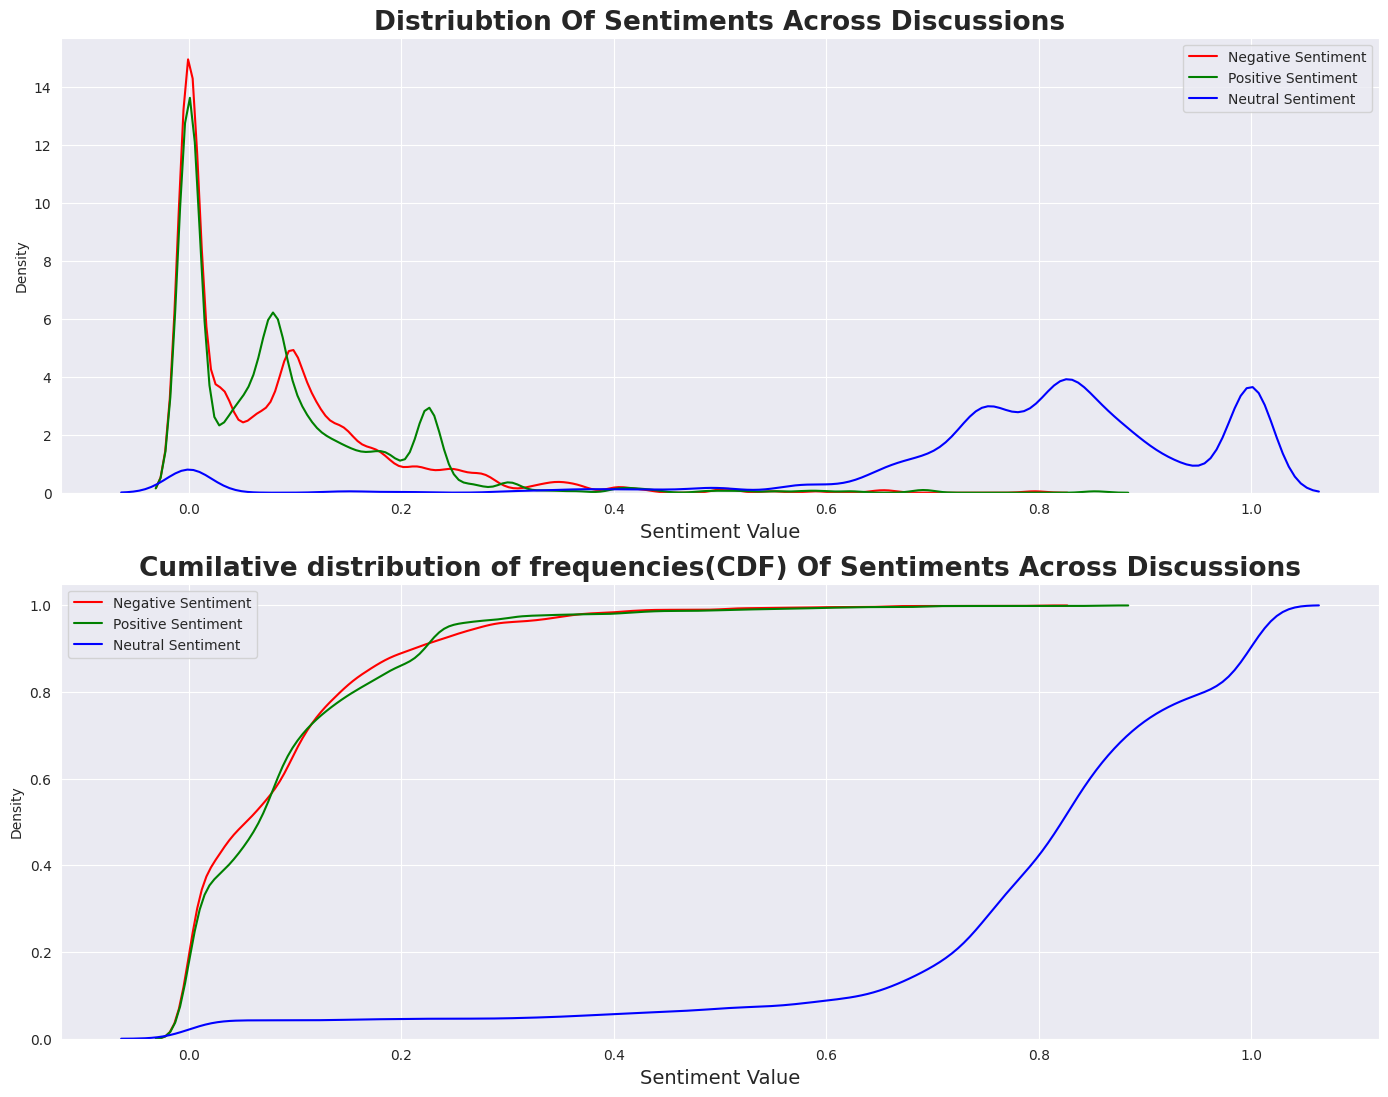

In [26]:
plt.subplot(2,1,1)
colors = ['red', 'green', 'blue']
plt.title('Distriubtion Of Sentiments Across Discussions',fontsize=19,fontweight='bold')
sns.kdeplot(body_data['Negative Sentiment'],bw_method=0.1, color=colors[0], label='Negative Sentiment')
sns.kdeplot(body_data['Positive Sentiment'],bw_method=0.1, color=colors[1], label='Positive Sentiment')
sns.kdeplot(body_data['Neutral Sentiment'],bw_method=0.1, color=colors[2], label='Neutral Sentiment')
plt.legend()  
plt.xlabel('Sentiment Value', fontsize=14)
plt.subplot(2,1,2)
plt.title('Cumilative distribution of frequencies(CDF) Of Sentiments Across Discussions',fontsize=19,fontweight='bold')
sns.kdeplot(body_data['Negative Sentiment'],bw_method=0.1,cumulative=True, color=colors[0], label='Negative Sentiment')
sns.kdeplot(body_data['Positive Sentiment'],bw_method=0.1,cumulative=True, color=colors[1], label='Positive Sentiment')
sns.kdeplot(body_data['Neutral Sentiment'],bw_method=0.1,cumulative=True, color=colors[2], label='Neutral Sentiment')
plt.legend()
plt.xlabel('Sentiment Value', fontsize=14)
# plt.tight_layout()
plt.show()

<div style="margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#e6ccff; padding: 10px 20px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Time based Sentiment Analysis</span>
</div>

In [27]:
# Sorting And Feature Engineering
f_data = body_data.sort_values(by='timestamp')
ft_data=f_data.copy()
ft_data = ft_data.rename(columns={'timestamp':'date'})
ft_data['year']         = pd.DatetimeIndex(ft_data['date']).year
ft_data['month']        = pd.DatetimeIndex(ft_data['date']).month
ft_data['day']          = pd.DatetimeIndex(ft_data['date']).day
ft_data['day_of_year']  = pd.DatetimeIndex(ft_data['date']).dayofyear
ft_data['quarter']      = pd.DatetimeIndex(ft_data['date']).quarter
ft_data['season']       = ft_data.month%12 // 3 + 1

In [28]:
ft_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 30990 to 10002
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   body                                    799 non-null    object 
 1   date                                    799 non-null    object 
 2   Positive Sentiment                      799 non-null    float64
 3   Neutral Sentiment                       799 non-null    float64
 4   Negative Sentiment                      799 non-null    float64
 5   # Of Words                              799 non-null    int64  
 6   # Of StopWords                          799 non-null    int64  
 7   Average Word Length                     797 non-null    float64
 8   # Of Times Events Was Mentioned         799 non-null    int64  
 9   # Of Organizations Mentioned            799 non-null    int64  
 10  # Of Political locations Mentioned      799 non-null    int64

In [29]:
ft_data.head()

body        date  \
30990  raqqah wilayah photo reports caravan of martyr...  2017-07-23   
30986  raqqah wilayah photo reports the ghanimah gran...  2017-07-24   
30980  raqqah wilayah photo reports the ishtishhadi o...  2017-07-25   
30945  july 25 raqqah wilayah photo reports ghanimah ...  2017-08-01   
30941  removed by reddit on account of violating the ...  2017-08-01   

       Positive Sentiment  Neutral Sentiment  Negative Sentiment  # Of Words  \
30990            0.032001           0.872001            0.096001         214   
30986            0.035001           0.837001            0.129001         512   
30980            0.045001           0.810001            0.144001         441   
30945            0.040001           0.816001            0.144001         423   
30941            0.167001           0.617001            0.216001          12   

       # Of StopWords  Average Word Length  # Of Times Events Was Mentioned  \
30990              60             6.038961                                0   
30986             179             6.330330                                0   
30980             163             6.298561                                0   
30945             135             6.197917                                0   
30941               4             7.375000                                0   

       # Of Organizations Mentioned  # Of Political locations Mentioned  \
30990                             4                                   0   
30986                             3                                   0   
30980                             1                                   1   
30945                             2                                   5   
30941                             0                                   0   

       # Of Non Political locations Mentioned  year  month  day  day_of_year  \
30990                                       0  2017      7   23          204   
30986                                       0  2017      7   24          205   
30980                                       1  2017      7   25          206   
30945                                       1  2017      8    1          213   
30941                                       0  2017      8    1          213   

       quarter  season  
30990        3       3  
30986        3       3  
30980        3       3  
30945        3       3  
30941        3       3

In [30]:
ft_data_copy = ft_data.copy()
ft_data_copy = ft_data_copy.reset_index().drop(columns=['index','body'])
ft_data_copy = ft_data_copy.rename(columns={'timestamp':'date'})

partitions = []
partitions.append(ft_data_copy.loc[44:np.round(len(ft_data_copy)/3,0)-1,:])
partitions.append(ft_data_copy.loc[np.round(len(ft_data_copy)/3,0):2*int(len(ft_data_copy)/3)-1,:])
partitions.append(ft_data_copy.loc[2*np.round(len(ft_data_copy)/3,0):3*int(len(ft_data_copy)/3)-1,:])

neg_part_means =[]
neg_part_std   =[]
pos_part_means =[]
pos_part_std   =[]
for part in partitions:
    neg_part_means.append(part['Negative Sentiment'].mean())
    neg_part_std.append(part['Negative Sentiment'].std())
    pos_part_means.append(part['Positive Sentiment'].mean())
    pos_part_std.append(part['Positive Sentiment'].std())
    
res_df = pd.DataFrame({'Positive Sentiment Mean':pos_part_means,'Negative Sentiment Mean':neg_part_means,'Positive Sentiment SD':pos_part_std,'Negative Sentiment SD':neg_part_std},
                     index = [f'Partition_{i}' for i in range(1,4)])


def highlight_greater(x):
    temp = x.copy()
    temp = temp.round(0).astype(int)
    m1 = (temp['Partition_1_Mean'] == temp['Partition_2_Mean'])
    m2 = (temp['Partition_1_SD'] == temp['Partition_2_SD'])
    m3 = (temp['Partition_1_Mean'] < temp['Partition_2_Mean']+3) & (temp['Partition_1_Mean'] > temp['Partition_2_Mean']-3)
    m4 = (temp['Partition_1_SD'] < temp['Partition_2_SD']+3) & (temp['Partition_1_SD'] > temp['Partition_2_SD']-3)

    df1 = pd.DataFrame('background-color: ', index=x.index, columns=x.columns)
    # rewrite values by boolean masks
    df1['Partition_1_Mean'] = np.where(~m1, 'background-color: {}'.format('salmon'),        df1['Partition_1_Mean'])
    df1['Partition_2_Mean'] = np.where(~m1, 'background-color: {}'.format('salmon'),        df1['Partition_2_Mean'])
    df1['Partition_1_Mean'] = np.where(m3, 'background-color: {}'.format('gold'),           df1['Partition_1_Mean'])
    df1['Partition_2_Mean'] = np.where(m3, 'background-color: {}'.format('gold'),           df1['Partition_2_Mean'])
    df1['Partition_1_Mean'] = np.where(m1, 'background-color: {}'.format('mediumseagreen'), df1['Partition_1_Mean'])
    df1['Partition_2_Mean'] = np.where(m1, 'background-color: {}'.format('mediumseagreen'), df1['Partition_2_Mean'])

    df1['Partition_1_SD'] = np.where(~m2, 'background-color: {}'.format('salmon'),        df1['Partition_1_SD'])
    df1['Partition_2_SD'] = np.where(~m2, 'background-color: {}'.format('salmon'),        df1['Partition_2_SD'])
    df1['Partition_1_SD'] = np.where(m4, 'background-color: {}'.format('gold'),           df1['Partition_1_SD'])
    df1['Partition_2_SD'] = np.where(m4, 'background-color: {}'.format('gold'),           df1['Partition_2_SD'])
    df1['Partition_1_SD'] = np.where(m2, 'background-color: {}'.format('mediumseagreen'), df1['Partition_1_SD'])
    df1['Partition_2_SD'] = np.where(m2, 'background-color: {}'.format('mediumseagreen'), df1['Partition_2_SD'])

    return df1

# res_df.style.apply(highlight_greater,axis=None)
res_df = res_df.T
res_df = pd.DataFrame(res_df.values,columns=res_df.columns,index=['Positive Sentiment','Negative Sentiment','Positive Sentiment','Negative Sentiment'])
res_df = pd.concat([res_df.iloc[:2,:],res_df.iloc[2:,:]],axis=1)
res_df.columns = ['Partition_1_Mean','Partition_2_Mean','Partition_3_Mean','Partition_1_SD','Partition_2_SD','Partition_3_SD']
res_df.style.apply(highlight_greater, axis=None)

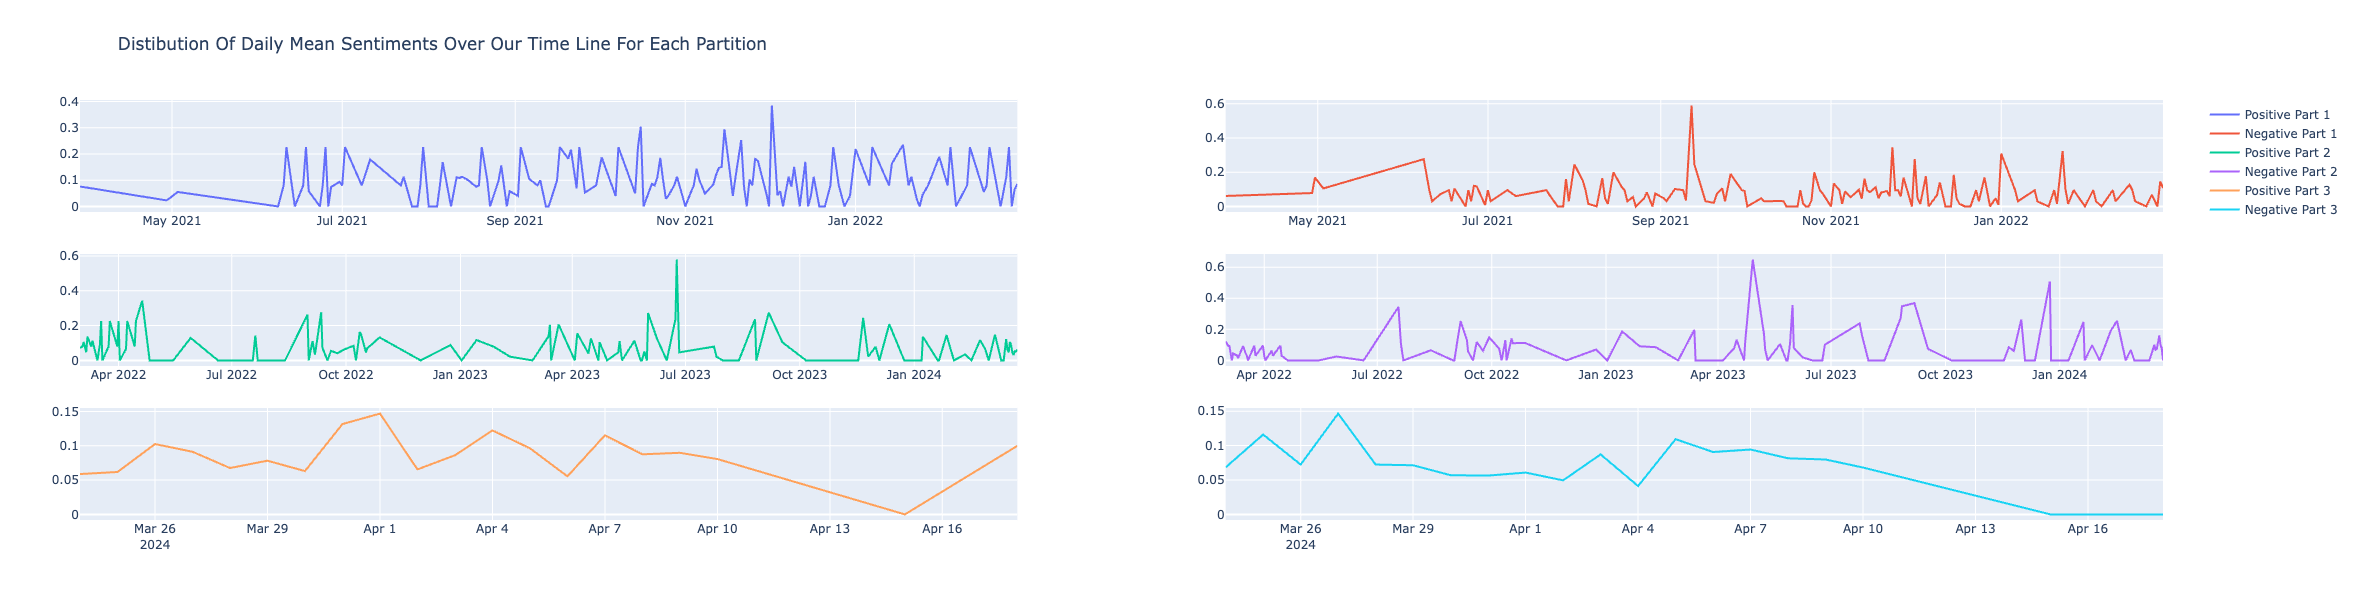

In [31]:
fig = make_subplots(rows=3, cols=2)

for idx,prt in enumerate(partitions):
    by_date = prt.groupby(by='date').mean().reset_index()
    fig.add_trace(
    go.Scatter(x=by_date['date'], y=by_date['Positive Sentiment'],name=f'Positive Part {idx+1}'),
    row=idx+1, col=1)
    fig.add_trace(
    go.Scatter(x=by_date['date'], y=by_date['Negative Sentiment'],name=f'Negative Part {idx+1}'),
    row=idx+1, col=2)

fig.update_layout(height=600, width=900, title_text="Distibution Of Daily Mean Sentiments Over Our Time Line For Each Partition")
fig.show()

In [32]:
ft_data

body        date  \
30990  raqqah wilayah photo reports caravan of martyr...  2017-07-23   
30986  raqqah wilayah photo reports the ghanimah gran...  2017-07-24   
30980  raqqah wilayah photo reports the ishtishhadi o...  2017-07-25   
30945  july 25 raqqah wilayah photo reports ghanimah ...  2017-08-01   
30941  removed by reddit on account of violating the ...  2017-08-01   
...                                                  ...         ...   
16     kemal ataturk wasdevout muslim but wasstaunch ...  2024-04-10   
0      ifrom the us historically not politically acti...  2024-04-10   
10008                    changing my sect after this one  2024-04-15   
10006  dont forget sunni oppression done in palestine...  2024-04-18   
10002  image 1syria admin claims henever even set foo...  2024-04-20   

       Positive Sentiment  Neutral Sentiment  Negative Sentiment  # Of Words  \
30990            0.032001           0.872001            0.096001         214   
30986            0.035001           0.837001            0.129001         512   
30980            0.045001           0.810001            0.144001         441   
30945            0.040001           0.816001            0.144001         423   
30941            0.167001           0.617001            0.216001          12   
...                   ...                ...                 ...         ...   
16               0.102001           0.850001            0.049001         155   
0                0.000001           0.685001            0.315001          23   
10008            0.000001           1.000001            0.000001           6   
10006            0.100001           0.900001            0.000001          16   
10002            0.000001           1.000001            0.000001          23   

       # Of StopWords  Average Word Length  # Of Times Events Was Mentioned  \
30990              60             6.038961                                0   
30986             179             6.330330                                0   
30980             163             6.298561                                0   
30945             135             6.197917                                0   
30941               4             7.375000                                0   
...               ...                  ...                              ...   
16                 69             6.930233                                0   
0                  10             5.692308                                0   
10008               3             5.000000                                0   
10006               5             5.636364                                0   
10002               3             5.850000                                0   

       # Of Organizations Mentioned  # Of Political locations Mentioned  \
30990                             4                                   0   
30986                             3                                   0   
30980                             1                                   1   
30945                             2                                   5   
30941                             0                                   0   
...                             ...                                 ...   
16                                0                                   4   
0                                 0                                   1   
10008                             0                                   0   
10006                             0                                   1   
10002                             0                                   0   

       # Of Non Political locations Mentioned  year  month  day  day_of_year  \
30990                                       0  2017      7   23          204   
30986                                       0  2017      7   24          205   
30980                                       1  2017      7   25          206   
30945                                       1  2017     

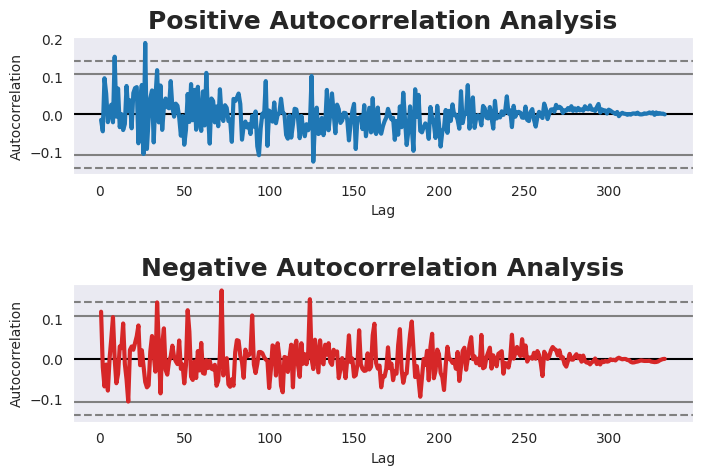

In [33]:
b_date_mean = ft_data_copy.groupby(by='date').mean().reset_index()
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 5))

ax[0].set_title('Positive Autocorrelation Analysis', fontsize=18, fontweight='bold')
autocorrelation_plot(b_date_mean['Positive Sentiment'], ax=ax[0], lw=3)
ax[1].set_title('Negative Autocorrelation Analysis', fontsize=18, fontweight='bold')
autocorrelation_plot(b_date_mean['Negative Sentiment'], ax=ax[1], color='tab:red', lw=3)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.8)

plt.show()


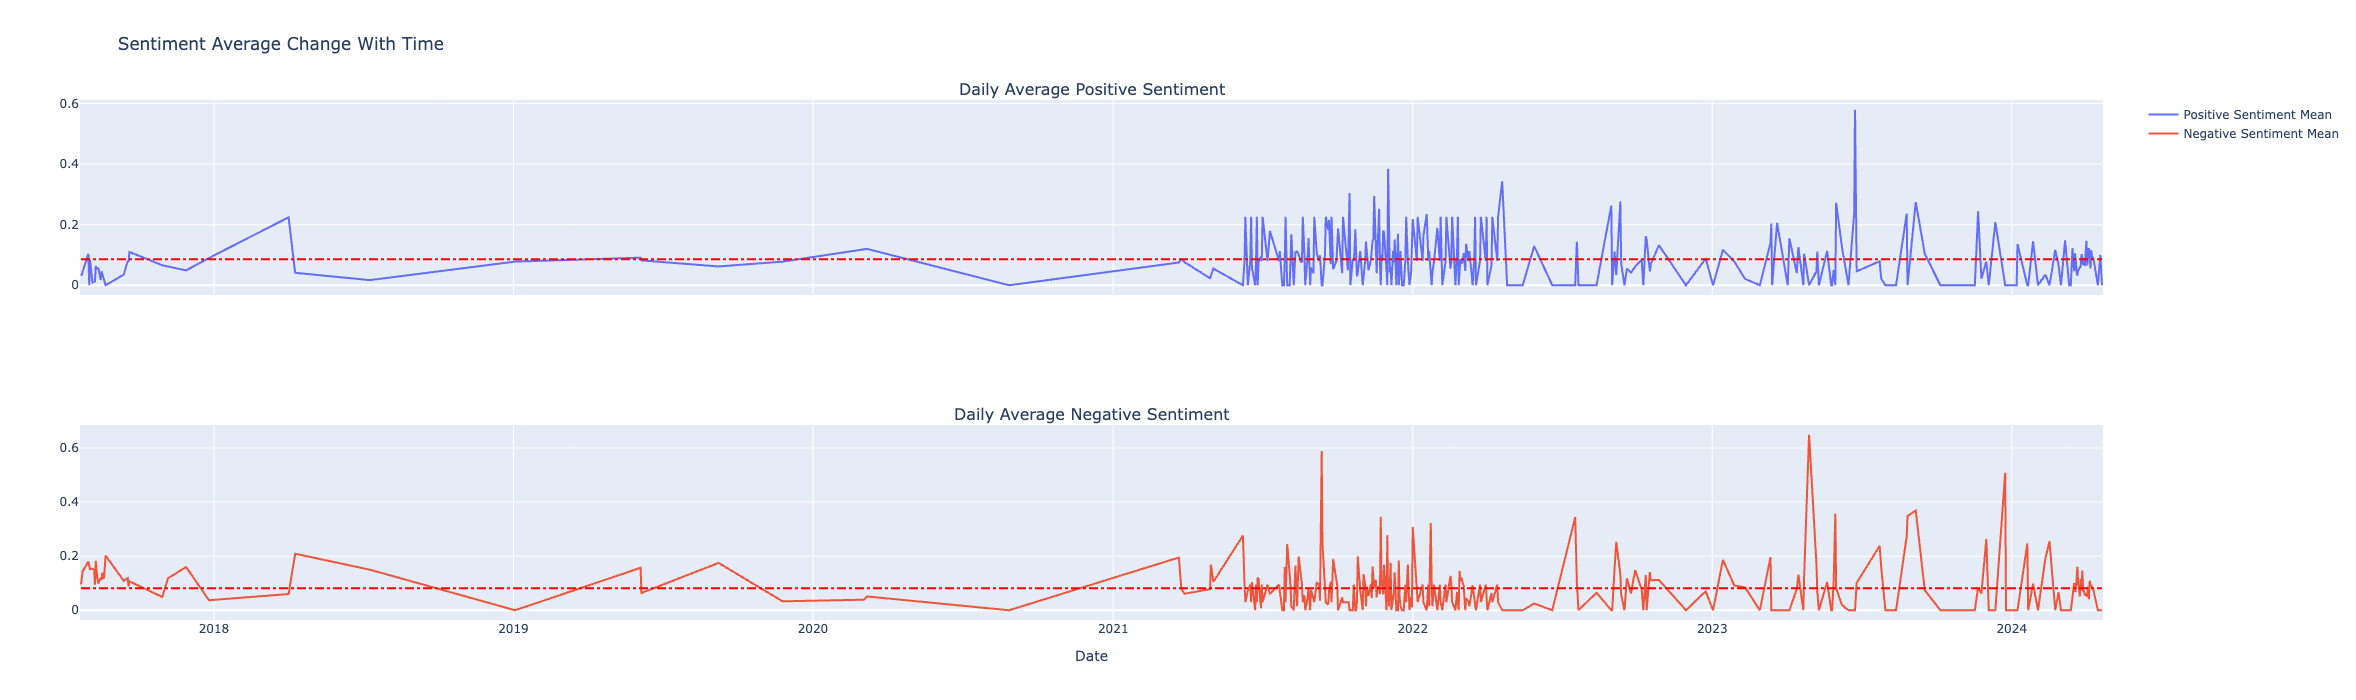

In [34]:
b_date_mean = ft_data_copy.groupby(by='date').mean().reset_index()
b_date_std = ft_data_copy.groupby(by='date').std().reset_index()

fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Daily Average Positive Sentiment',  'Daily Average Negative Sentiment'))

fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['Positive Sentiment'],name='Positive Sentiment Mean'),
    row=1, col=1
)

# positive mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['Positive Sentiment'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['Positive Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean'
)

fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['Negative Sentiment'],name='Negative Sentiment Mean'),
    row=2, col=1
)

# negative mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['Negative Sentiment'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2'
)

fig['layout']['xaxis2']['title'] = 'Date'
fig.update_layout(height=700, width=900, title_text="Sentiment Average Change With Time")
fig.show()

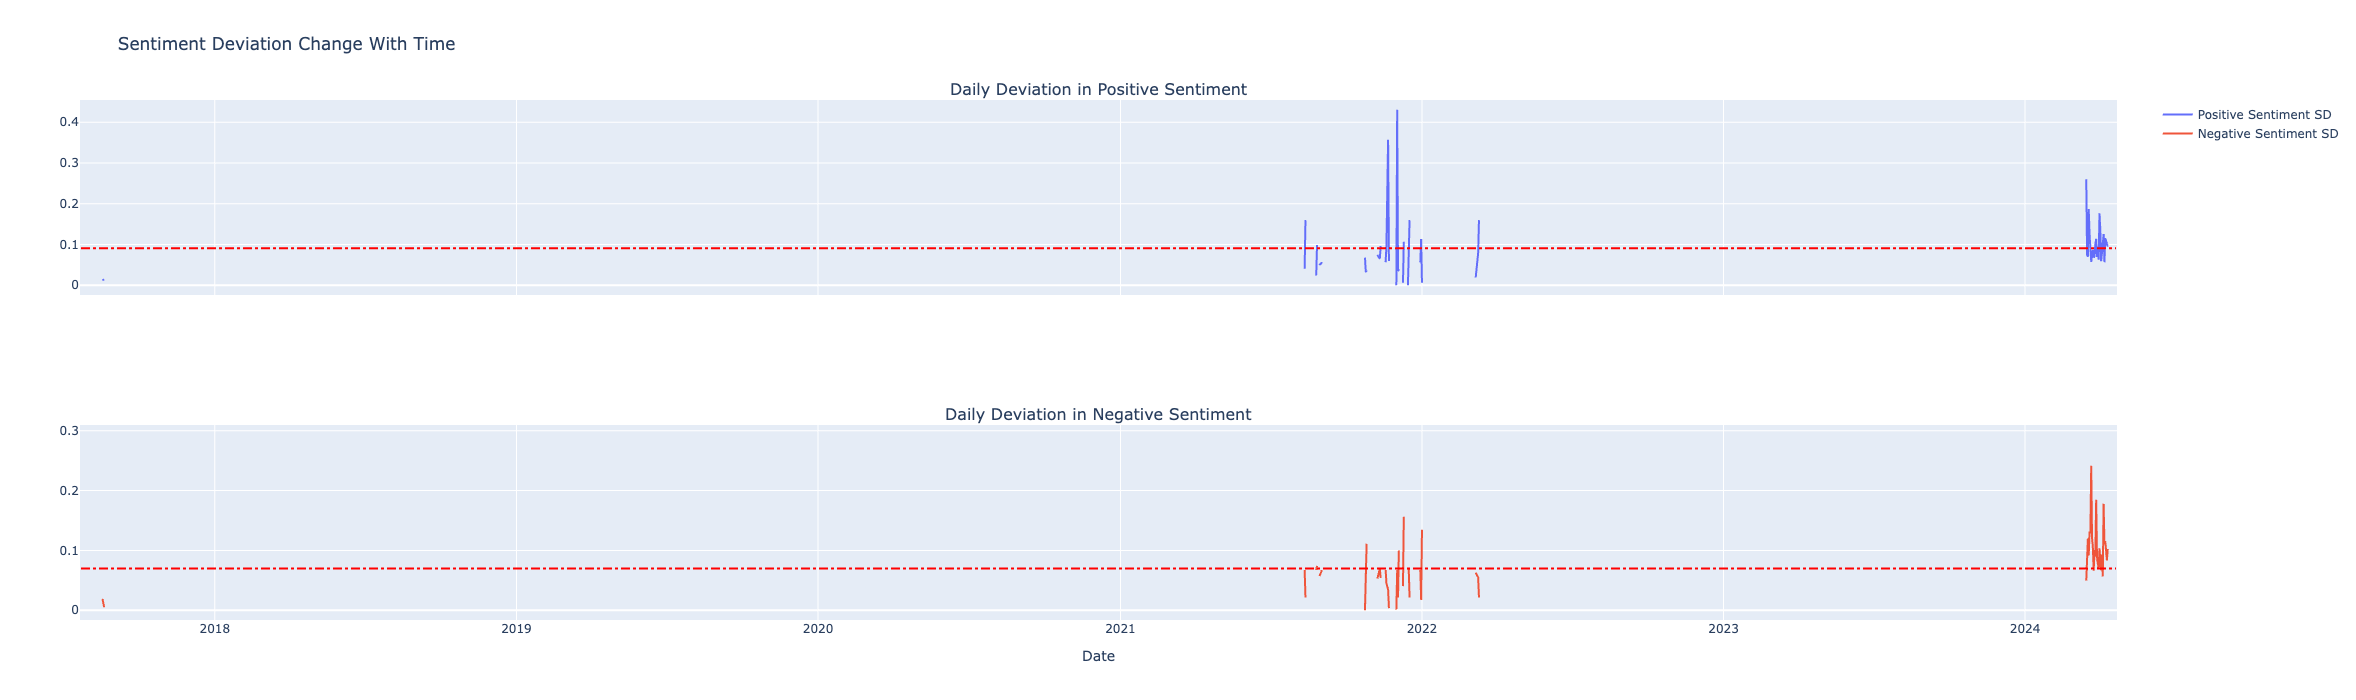

In [35]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Daily Deviation in Positive Sentiment',  'Daily Deviation in Negative Sentiment'))

fig.add_trace(
    go.Scatter(x=b_date_std['date'], y=b_date_std['Positive Sentiment'],name='Positive Sentiment SD'),
    row=1, col=1
)

#negative mean
fig.add_shape(type="line",
    x0=b_date_std['date'].values[0], y0=b_date_std['Negative Sentiment'].mean(), x1=b_date_std['date'].values[-1], y1=b_date_std['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2'
)

#negative mean
fig.add_shape(type="line",
    x0=b_date_std['date'].values[0], y0=b_date_std['Positive Sentiment'].mean(), x1=b_date_std['date'].values[-1], y1=b_date_std['Positive Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x1', 
        yref='y1'
)


fig.add_trace(
    go.Scatter(x=b_date_std['date'], y=b_date_std['Negative Sentiment'],name='Negative Sentiment SD'),
    row=2, col=1
)

fig['layout']['xaxis2']['title'] = 'Date'
fig.update_layout(height=700, width=900, title_text="Sentiment Deviation Change With Time")
fig.show()

In [36]:
b_date_count = ft_data_copy.groupby(by='date').count().reset_index()

In [37]:
b_date_count

date  Positive Sentiment  Neutral Sentiment  Negative Sentiment  \
0    2017-07-23                   1                  1                   1   
1    2017-07-24                   1                  1                   1   
2    2017-07-25                   1                  1                   1   
3    2017-08-01                   2                  2                   2   
4    2017-08-02                   1                  1                   1   
..          ...                 ...                ...                 ...   
328  2024-04-09                  13                 13                  13   
329  2024-04-10                  11                 11                  11   
330  2024-04-15                   1                  1                   1   
331  2024-04-18                   1                  1                   1   
332  2024-04-20                   1                  1                   1   

     # Of Words  # Of StopWords  Average Word Length  \
0             1               1                    1   
1             1               1                    1   
2             1               1                    1   
3             2               2                    2   
4             1               1                    1   
..          ...             ...                  ...   
328          13              13                   13   
329          11              11                   11   
330           1               1                    1   
331           1               1                    1   
332           1               1                    1   

     # Of Times Events Was Mentioned  # Of Organizations Mentioned  \
0                                  1                             1   
1                                  1                             1   
2                                  1                             1   
3                                  2                             2   
4                                  1                             1   
..                               ...                           ...   
328                               13                            13   
329                               11                            11   
330                                1                             1   
331                                1                             1   
332                                1                             1   

     # Of Political locations Mentioned  \
0                                     1   
1                                     1   
2                                     1   
3                                     2   
4                                     1   
..                                  ...   
328                                  13   
329                                  11   
330                                   1   
331                                   1   
332                                   1   

     # Of Non Political locations Mentioned  year  month  day  day_of_year  \
0                                         1     1      1    1            1   
1                                         1     1      1    1            1   
2                                         1     1      1    1            1   
3                                         2     2      2    2            2   
4                                         1     1      1    1            1   
..                                      ...   ...    ...  ...          ...   
328                                      13    13     13   13           13   
329                                      11    11     11   11           11   
330                                       1     1      1    1            1   
331                                       1     1      1    1            1   
332                                       1     1      1    1            1   

     quarter  season  
0          1       1  
1          1       1  
2          1       1  
3          2  

In [38]:
b_date_count = b_date_count.rename(columns={'title':'Posts Per Day'})
b_date_count

date  Positive Sentiment  Neutral Sentiment  Negative Sentiment  \
0    2017-07-23                   1                  1                   1   
1    2017-07-24                   1                  1                   1   
2    2017-07-25                   1                  1                   1   
3    2017-08-01                   2                  2                   2   
4    2017-08-02                   1                  1                   1   
..          ...                 ...                ...                 ...   
328  2024-04-09                  13                 13                  13   
329  2024-04-10                  11                 11                  11   
330  2024-04-15                   1                  1                   1   
331  2024-04-18                   1                  1                   1   
332  2024-04-20                   1                  1                   1   

     # Of Words  # Of StopWords  Average Word Length  \
0             1               1                    1   
1             1               1                    1   
2             1               1                    1   
3             2               2                    2   
4             1               1                    1   
..          ...             ...                  ...   
328          13              13                   13   
329          11              11                   11   
330           1               1                    1   
331           1               1                    1   
332           1               1                    1   

     # Of Times Events Was Mentioned  # Of Organizations Mentioned  \
0                                  1                             1   
1                                  1                             1   
2                                  1                             1   
3                                  2                             2   
4                                  1                             1   
..                               ...                           ...   
328                               13                            13   
329                               11                            11   
330                                1                             1   
331                                1                             1   
332                                1                             1   

     # Of Political locations Mentioned  \
0                                     1   
1                                     1   
2                                     1   
3                                     2   
4                                     1   
..                                  ...   
328                                  13   
329                                  11   
330                                   1   
331                                   1   
332                                   1   

     # Of Non Political locations Mentioned  year  month  day  day_of_year  \
0                                         1     1      1    1            1   
1                                         1     1      1    1            1   
2                                         1     1      1    1            1   
3                                         2     2      2    2            2   
4                                         1     1      1    1            1   
..                                      ...   ...    ...  ...          ...   
328                                      13    13     13   13           13   
329                                      11    11     11   11           11   
330                                       1     1      1    1            1   
331                                       1     1      1    1            1   
332                                       1     1      1    1            1   

     quarter  season  
0          1       1  
1          1       1  
2          1       1  
3          2  

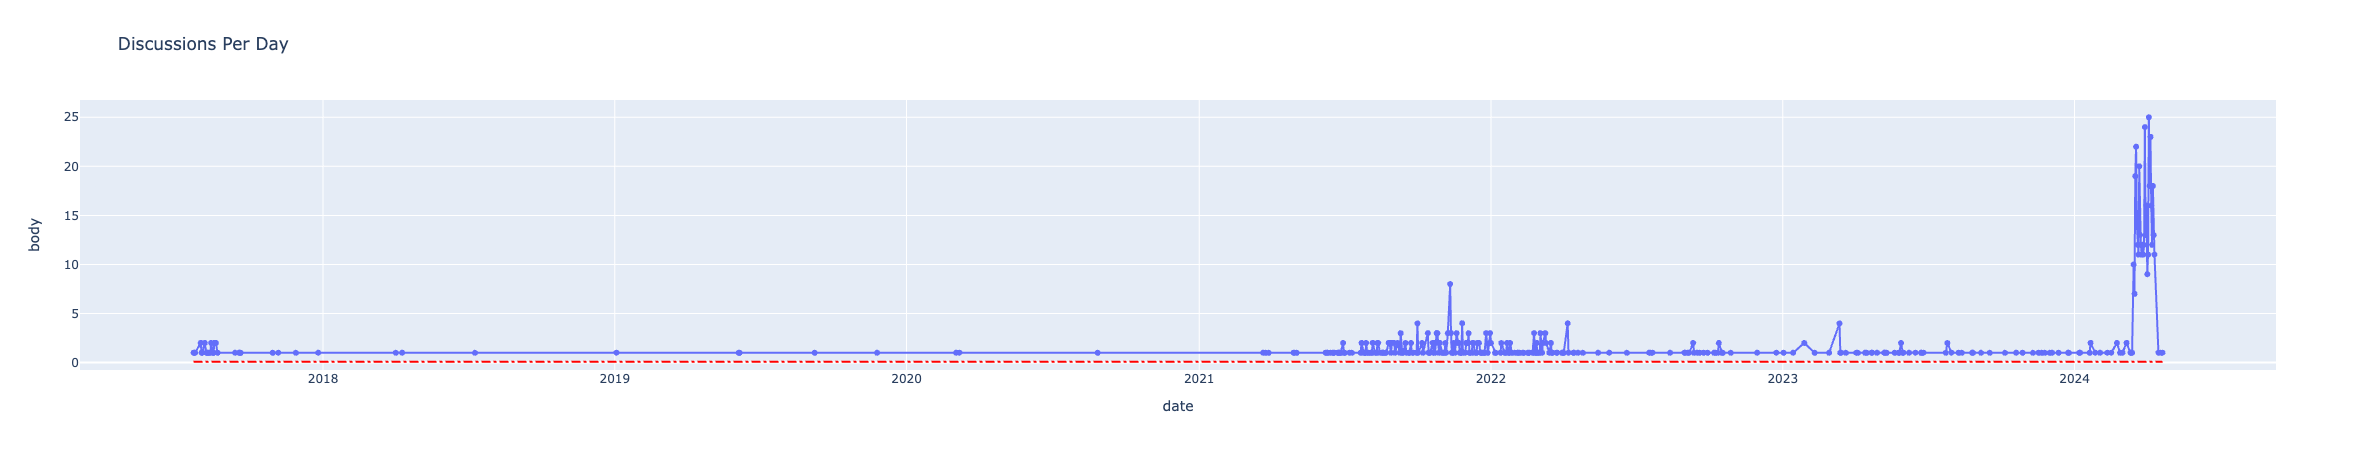

In [39]:
import plotly.express as ex
import plotly.graph_objects as go

# Assuming 'ft_data' is your DataFrame
b_date_count = ft_data.groupby(by='date').count().reset_index()

# Create a line chart using plotly express
fig = ex.line(b_date_count, x='date', y='body', title='Discussions Per Day')

# Add a horizontal line at the mean value of 'Negative Sentiment'
mean_negative_sentiment = ft_data['Negative Sentiment'].mean()
fig.add_shape(
    type="line",
    x0=b_date_count['date'].values[0],
    y0=mean_negative_sentiment,
    x1=b_date_count['date'].values[-1],
    y1=mean_negative_sentiment,
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
    name='Mean Negative Sentiment',
)

# Set the trace mode to show markers and lines
fig.update_traces(mode="markers+lines")

# Set the hover mode to show information for all points along the x-axis
fig.update_layout(hovermode="x unified")

# Show the figure
fig.show()


In [40]:
sid = SIA()
body_data['sentiments']           = body_data['body'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
body_data['Compound Sentiment']   = body_data['sentiments'].apply(lambda x: x['compound']+1*(10**-6))
body_data.drop(columns=['sentiments'],inplace=True)

In [41]:
conditions = [
    (body_data['Compound Sentiment'] <= -0.5),
    (body_data['Compound Sentiment'] > -0.5) & (body_data['Compound Sentiment'] < 0.5),
    (body_data['Compound Sentiment'] > 0.5)
]

# Define corresponding values for each condition
values = ['Negative', 'Neutral', 'Positive']

# Create a new column 'Category' using np.select to assign values based on the conditions
body_data['Category'] = np.select(conditions, values)

In [42]:
# Group the DataFrame by 'Category' and count the occurrences of each category
category_counts = body_data.groupby(['Category'])['Category'].count()

# Create a DataFrame with counts and rename the column to 'Counts'
counts_df = pd.DataFrame(category_counts).rename(columns={"Category": "Counts"})

# Calculate the percentage for each category and add it as a new column 'Percentage'
counts_df['Percentage'] = (counts_df['Counts'] / counts_df['Counts'].sum()) * 100

# counts_df = counts_df.drop(index='0')

# Print or return the summary DataFrame
print(counts_df)

          Counts  Percentage
Category                    
Negative     205   25.657071
Neutral      416   52.065081
Positive     178   22.277847


<div style="text-align: center; margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#ffd9e6; padding: 10px 150px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Results</span>
</div>

<div style="margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#ffd9e6; padding: 10px 20px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Pie Chart Of Sentiment Count</span>
</div>

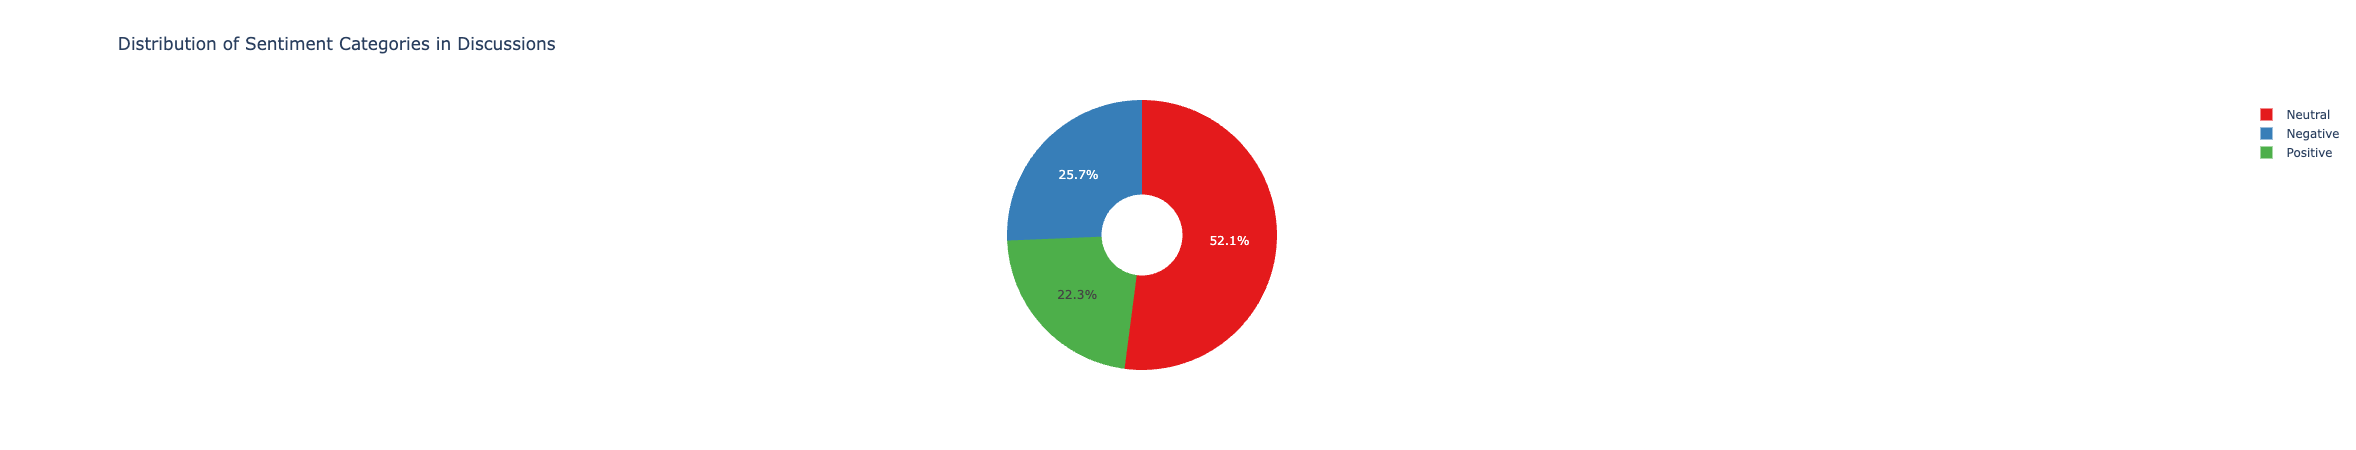

In [43]:
import plotly.express as px

# Create a Pie Chart using Plotly
fig = px.pie(counts_df, values='Counts', names=counts_df.index, 
             labels={'Category': 'Sentiment Category', 'Counts': 'Count'},
             title='Distribution of Sentiment Categories in Discussions',
             hole=0.3, 
             color_discrete_sequence=px.colors.qualitative.Set1)

# Set the background color of the Pie Chart to white
# fig.update_layout(paper_bgcolor='white')

# Show the Plotly Pie Chart
fig.show()

<div style="margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#ffd9e6; padding: 10px 20px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Positive Score Comments</span>
</div>

In [44]:
# Select the top 50 discussions with the highest 'Compound' scores from the DataFrame
top_50_pos_discussions = body_data.nlargest(n=50, columns=['Compound Sentiment'])["body"]

# This line selects the top 50 comments based on their 'Compound' scores,
# indicating the 50 comments with the most positive sentiment.

print(top_50_pos_discussions)

647      people often inquire about how we manage to su...
20730    now one would be tempted to call them an hts c...
20726    though the claim hts isrebranding of nusra is ...
20736    x200b this insect is pretty bad even by assadi...
383      why are many muslims against liberalism seriou...
488      my observation is that most arabs are more foc...
850      hello everyoneam christian arab howeverdonhave...
20855    i urge people to ignore the kind of clickbait ...
20114    hello fellow syrian revolution supporters than...
246      orban mentioned that he feels more at home at ...
10042    inotknowledgeable person about rome so feel fr...
778      in gazastreets where chaos reigns amidst the r...
20685    good morningamuniversity student in the united...
20519    we are looking for fresh passionate redditors ...
20890    okay after not being on reddti forbitam supris...
414      iconvinced that us policy in the middle east w...
54       understanding the complexity of arab leaders s.

<div style="margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#ffd9e6; padding: 10px 20px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Negative Score Comments</span>
</div>

In [45]:
# Select the top 50 comments with the least 'Compound' scores from the DataFrame
top_50_neg_comments = body_data.nsmallest(n=50, columns=['Compound Sentiment'])["body"]

print(top_50_neg_comments)

30936    damascus there is no truth onhot june afternoo...
159      russia is also interested in exploiting the pr...
30515    attack on4 airbasesyrian military source confi...
197      m jalal hashim juba 5 april 2024 there isgiven...
468      let me get this out of the way firsthate hezbo...
30655    the islamic military alliance to fight terrori...
30986    raqqah wilayah photo reports the ghanimah gran...
30945    july 25 raqqah wilayah photo reports ghanimah ...
30980    raqqah wilayah photo reports the ishtishhadi o...
30925    august 3 raqqah wilayah photo reports the mart...
287      sanhedrin 43a new testament says he was killed...
30937    raqqah wilayah photo reports targeting pkk mur...
10636    x200b turkey continues to fail to comply with ...
20749    notice how certain groups are holding strong t...
710      i reside in gaza and the situation here has pl...
30911    raqqah wilayah photo reports targeting nusayri...
10173    a poem by created by the worlds smartest ai th.

In [46]:
body_data.head(1)

body   timestamp  \
0  ifrom the us historically not politically acti...  2024-04-10   

   Positive Sentiment  Neutral Sentiment  Negative Sentiment  # Of Words  \
0            0.000001           0.685001            0.315001          23   

   # Of StopWords  Average Word Length  # Of Times Events Was Mentioned  \
0              10             5.692308                                0   

   # Of Organizations Mentioned  # Of Political locations Mentioned  \
0                             0                                   1   

   # Of Non Political locations Mentioned  Compound Sentiment  Category  
0                                       0           -0.847299  Negative

<div style="margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#ffd9e6; padding: 10px 20px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Visualization Of Sentiment Scores Of Positive, Neutral & Negative Posts</span>
</div>

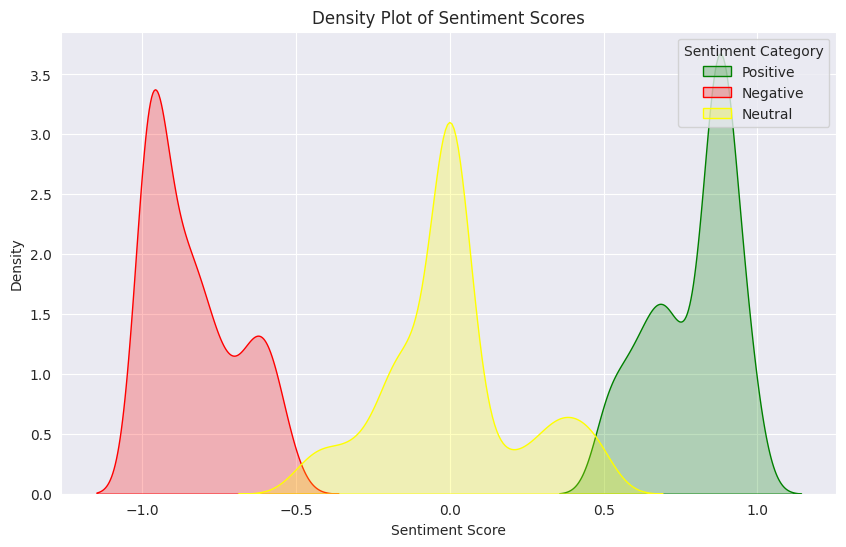

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the sentiment categories and corresponding colors
sentiment_categories = ["Positive", "Negative", "Neutral"]
colors = ['green', 'red', 'yellow']

# Set up the plot
plt.figure(figsize=(10, 6))

# Iterate over sentiment categories and plot KDE
for category, color in zip(sentiment_categories, colors):
    sns.kdeplot(body_data[body_data['Category'] == category]['Compound Sentiment'], 
                color=color, label=category, shade=True)

# Set plot labels and legend
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Density Plot of Sentiment Scores')
plt.legend(title='Sentiment Category')

# Show the plot
plt.show()


<div style="margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#ffd9e6; padding: 10px 20px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Visualization Of Sentiment Scores</span>
</div>

<Axes: xlabel='Compound Sentiment', ylabel='Density'>

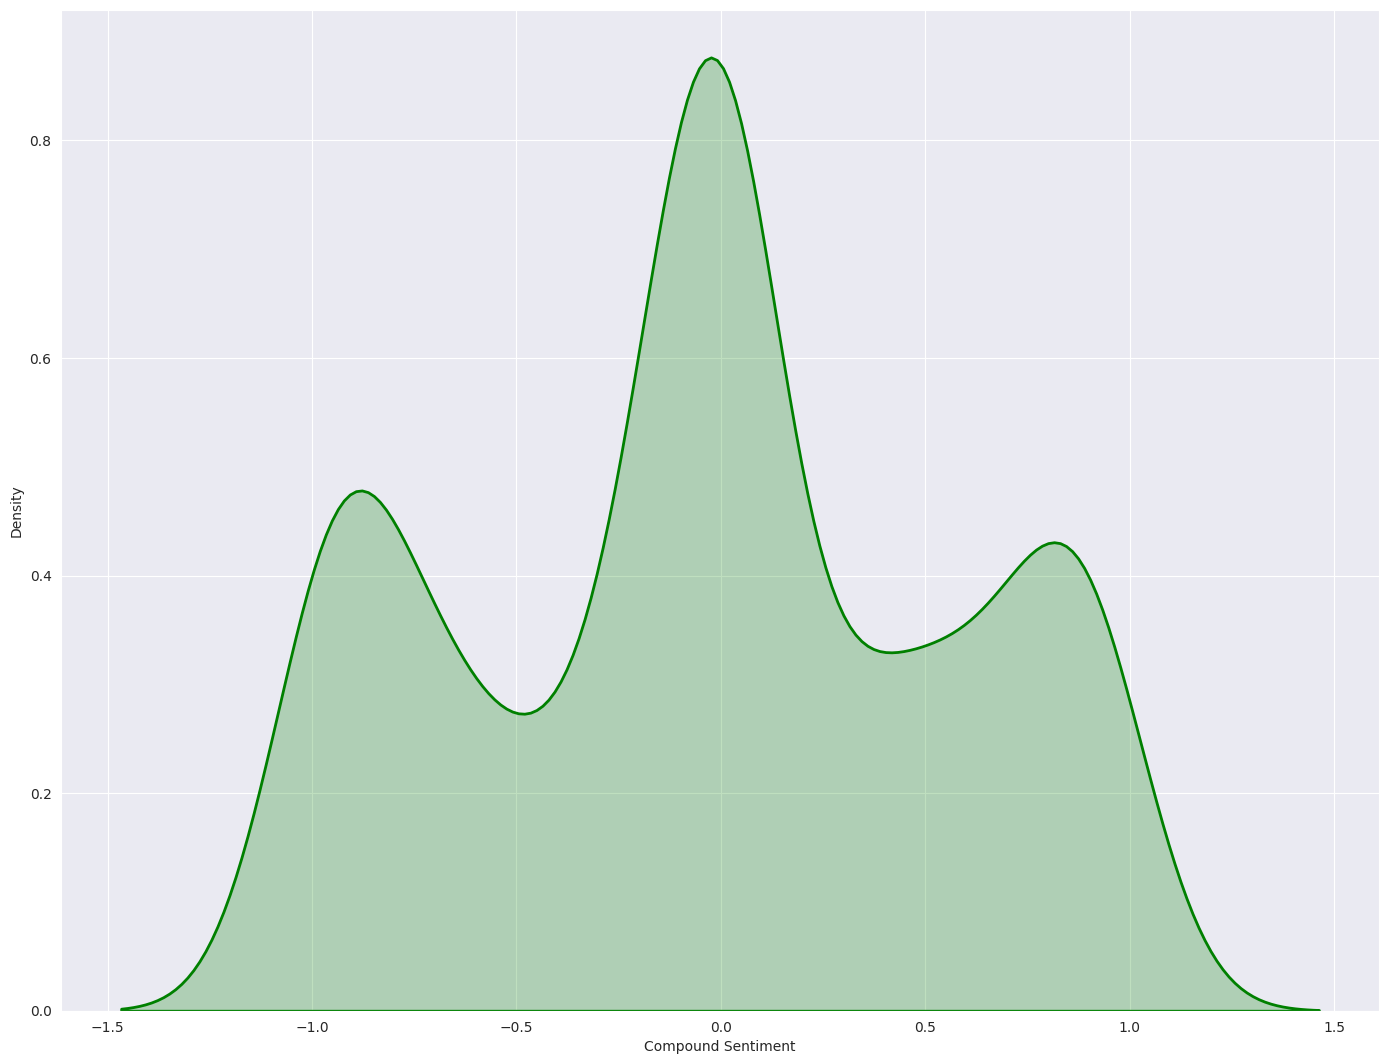

In [48]:
sns.distplot(body_data["Compound Sentiment"], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

<div style="margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#ffd9e6; padding: 10px 20px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Word Cloud Of All Sentiments</span>
</div>

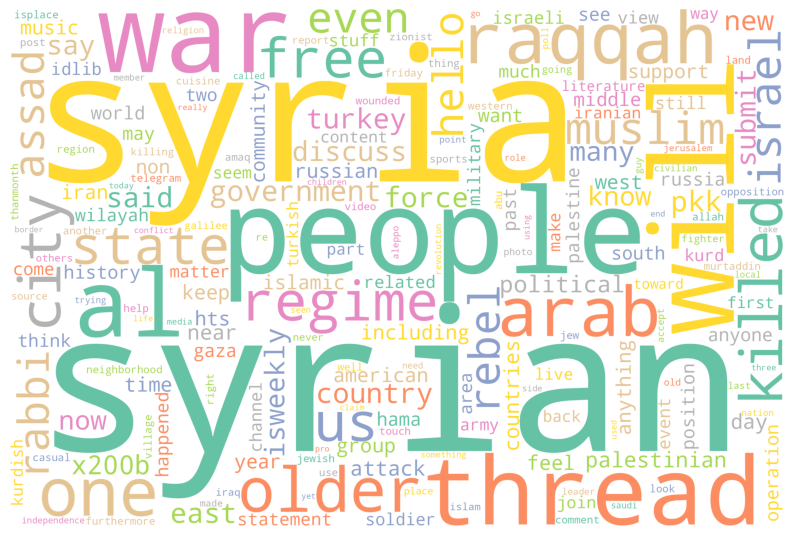

In [49]:
# Concatenate all comments into a single string
text = " ".join(ft_data['body'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="white",
                      colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(10, 8))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<div style="margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#ffd9e6; padding: 10px 20px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Word Cloud Of Neutral Sentiments</span>
</div>

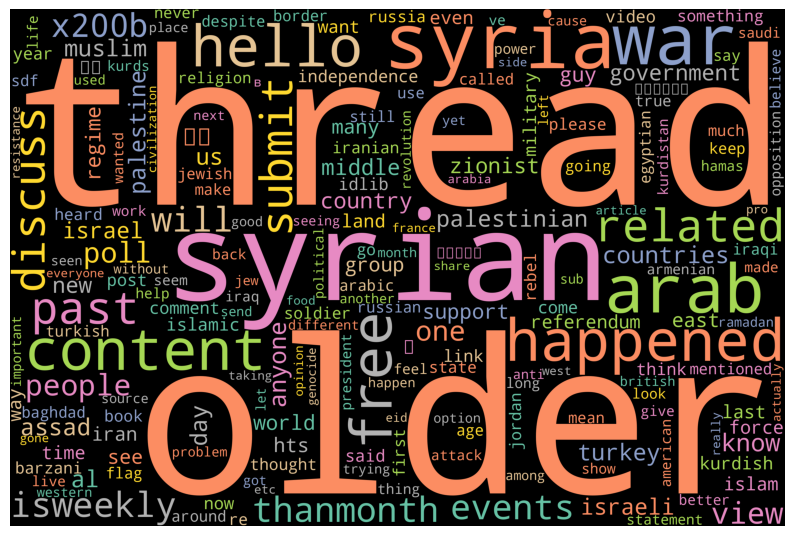

In [50]:
# Concatenate all comments into a single string
neutral_data = body_data[body_data['Category'] == 'Neutral']
text = " ".join(neutral_data['body'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                      colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(10, 8))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<div style="margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#ffd9e6; padding: 10px 20px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Word Cloud Of Positive Sentiments</span>
</div>

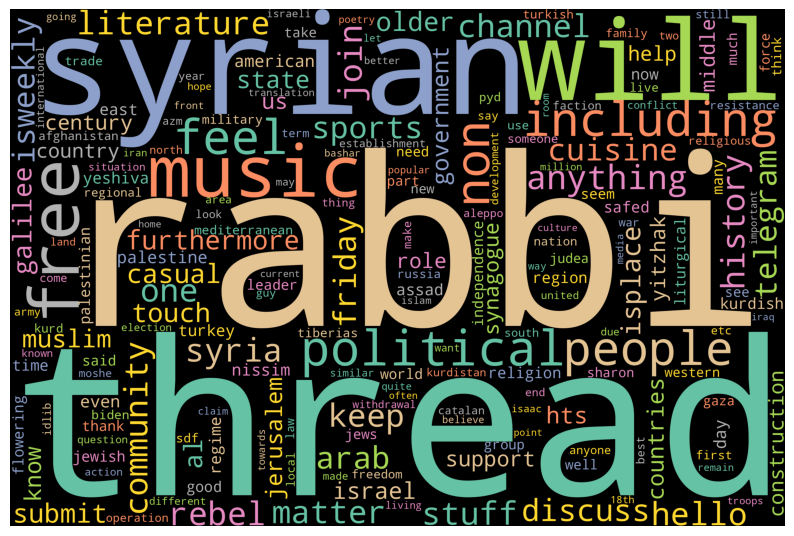

In [51]:
# Concatenate all comments into a single string
positive_data = body_data[body_data['Category'] == 'Positive']
text = " ".join(positive_data['body'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                      colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(10, 8))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<div style="margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#ffd9e6; padding: 10px 20px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Word Cloud Of Negative Sentiments</span>
</div>

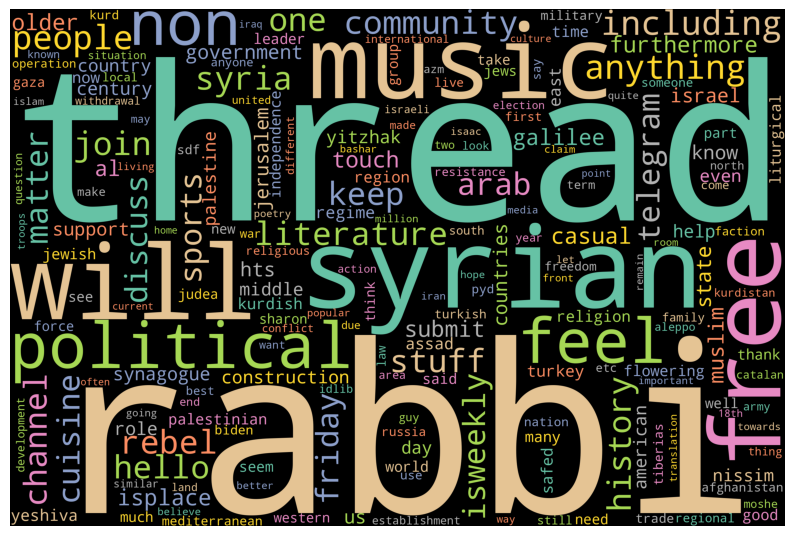

In [52]:
# Concatenate all comments into a single string
negative_data = body_data[body_data['Category'] == 'Positive']
text = " ".join(negative_data['body'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                      colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(10, 8))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<div style="margin-top: 10px; margin-bottom: 10px;">
    <span style="font-family: Arial, sans-serif; background-color:#ffd9e6; padding: 10px 20px; border-radius: 10px; font-size: 20pt; font-weight: bold;">Frequency Of Words For Sentiments</span>
</div>

In [53]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string

# Tokenize and clean text
def process_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

# Separate positive and negative sentiment
positive_words = ' '.join(body_data[body_data['Category'] == 'Positive']['body'])
negative_words = ' '.join(body_data[body_data['Category'] == 'Negative']['body'])
neutral_words = ' '.join(body_data[body_data['Category'] == 'Neutral']['body'])
all_words = ' '.join(body_data['body'])

# Process text
positive_tokens = process_text(positive_words)
negative_tokens = process_text(negative_words)
neutral_tokens = process_text(neutral_words)
all_tokens = process_text(all_words)

# Get most common words
most_common_positive = Counter(positive_tokens).most_common(10)
most_common_negative = Counter(negative_tokens).most_common(10)
most_common_neutral = Counter(neutral_tokens).most_common(10)
most_common_all = Counter(all_tokens).most_common(10)

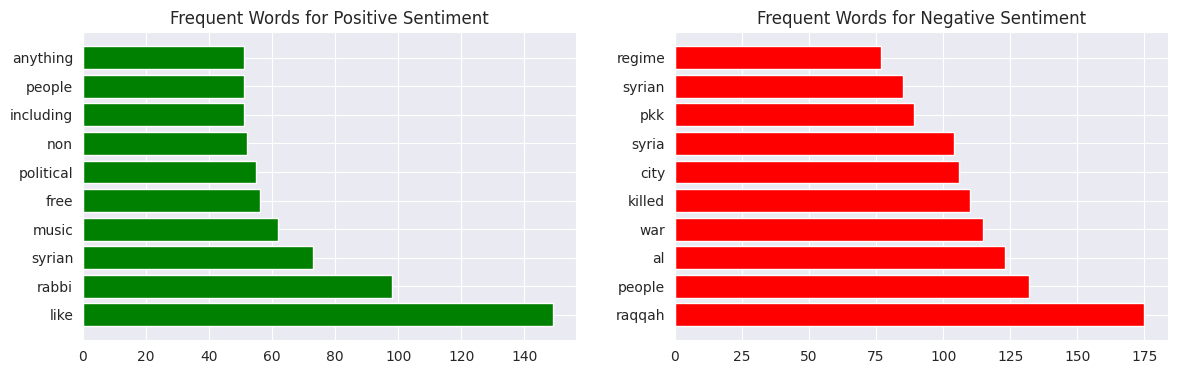

In [54]:
import matplotlib.pyplot as plt

colors = [
    'purple', 'orange', 'cyan', 'magenta', 'yellow',
    'brown', 'pink', 'violet', 'indigo', 'teal', 'olive', 'maroon', 'navy',
    'aquamarine', 'gold', 'darkred', 'lime', 'mediumblue']

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14,4))

# Positive sentiment
positive_words, positive_counts = zip(*most_common_positive)
axes[0].barh(positive_words, positive_counts, color='green')
axes[0].set_title('Frequent Words for Positive Sentiment')

# Negative sentiment
negative_words, negative_counts = zip(*most_common_negative)
axes[1].barh(negative_words, negative_counts, color='red')
axes[1].set_title('Frequent Words for Negative Sentiment')

plt.show()

In [55]:
body_data

body   timestamp  \
0      ifrom the us historically not politically acti...  2024-04-10   
2        like trade on land water and air and air travel  2024-04-10   
3      why is the uae so hostile towards algeria rece...  2024-04-10   
5      he is currently hiding in qatar and his commen...  2024-04-10   
9                                                  x200b  2024-04-10   
...                                                  ...         ...   
30941  removed by reddit on account of violating the ...  2017-08-01   
30945  july 25 raqqah wilayah photo reports ghanimah ...  2017-08-01   
30980  raqqah wilayah photo reports the ishtishhadi o...  2017-07-25   
30986  raqqah wilayah photo reports the ghanimah gran...  2017-07-24   
30990  raqqah wilayah photo reports caravan of martyr...  2017-07-23   

       Positive Sentiment  Neutral Sentiment  Negative Sentiment  # Of Words  \
0                0.000001           0.685001            0.315001          23   
2                0.217001           0.783001            0.000001          10   
3                0.000001           0.877001            0.123001          25   
5                0.000001           0.821001            0.179001          25   
9                0.000001           1.000001            0.000001           1   
...                   ...                ...                 ...         ...   
30941            0.167001           0.617001            0.216001          12   
30945            0.040001           0.816001            0.144001         423   
30980            0.045001           0.810001            0.144001         441   
30986            0.035001           0.837001            0.129001         512   
30990            0.032001           0.872001            0.096001         214   

       # Of StopWords  Average Word Length  # Of Times Events Was Mentioned  \
0                  10             5.692308                                0   
2                   4             4.333333                                0   
3                  10             7.133333                                0   
5                  12             7.000000                                0   
9                   0             5.000000                                0   
...               ...                  ...                              ...   
30941               4             7.375000                                0   
30945             135             6.197917                                0   
30980             163             6.298561                                0   
30986             179             6.330330                                0   
30990              60             6.038961                                0   

       # Of Organizations Mentioned  # Of Political locations Mentioned  \
0                                 0                                   1   
2                                 0                                   0   
3                                 0                                   3   
5                                 0                                   1   
9                                 0                                   0   
...                             ...                                 ...   
30941                             0                                   0   
30945                             2                                   5   
30980                             1                                   1   
30986                             3                                   0   
30990                             4                                   0   

       # Of Non Political locations Mentioned  Compound Sentiment  Category  
0                                           0           -0.847299  Negative  
2                                           0            0.361201   Neutral  
3                                           0           -0.521399  Negative  
5                                           0           -0.61239

In [56]:
body_data.head()

body   timestamp  \
0  ifrom the us historically not politically acti...  2024-04-10   
2    like trade on land water and air and air travel  2024-04-10   
3  why is the uae so hostile towards algeria rece...  2024-04-10   
5  he is currently hiding in qatar and his commen...  2024-04-10   
9                                              x200b  2024-04-10   

   Positive Sentiment  Neutral Sentiment  Negative Sentiment  # Of Words  \
0            0.000001           0.685001            0.315001          23   
2            0.217001           0.783001            0.000001          10   
3            0.000001           0.877001            0.123001          25   
5            0.000001           0.821001            0.179001          25   
9            0.000001           1.000001            0.000001           1   

   # Of StopWords  Average Word Length  # Of Times Events Was Mentioned  \
0              10             5.692308                                0   
2               4             4.333333                                0   
3              10             7.133333                                0   
5              12             7.000000                                0   
9               0             5.000000                                0   

   # Of Organizations Mentioned  # Of Political locations Mentioned  \
0                             0                                   1   
2                             0                                   0   
3                             0                                   3   
5                             0                                   1   
9                             0                                   0   

   # Of Non Political locations Mentioned  Compound Sentiment  Category  
0                                       0           -0.847299  Negative  
2                                       0            0.361201   Neutral  
3                                       0           -0.521399  Negative  
5                                       0           -0.612399  Negative  
9                                       0            0.000001   Neutral